# Lecture 4: Finite Markov Chains

Good interactive illustration of Markov Chains (MC)  can be found [here](http://setosa.io/ev/markov-chains/). 

## Simulations

To simulate a MC one need to either set an initial pure state (probability/state vector with all but one components zero) or initial mixed state (probability/state vector of positive reals summing up to unity). 

We use Julia module "QuantEcon" to simulate Markov chains.  

In [23]:
using QuantEcon

P = [.4 .6; .2 .8]; # Transition Matrix
mc = MarkovChain(P); # Initialization of a discreate Markov chain

X = mc_sample_path(mc, [0.5, 0.5], 100000); # An example of evolution. The second argument is initial distribution, 
                                            # the third is the length of the chain

println(mean(X .== 1)) # The probability to find a system in the state {1}

println(is_irreducible(mc)) # Testing for reducibility

println(period(mc)) # Find the period of a chain

println(is_aperiodic(mc)) # Testing for aperiodicity


0.2501
true
1
true


## Stationary Distributions

A distribution $\psi^*$ on the state space $S$ is called stationary or invariant over the transition matrix $P$, if $P \psi^* = \psi^*$. Recall that in this lecture we are assuming that the state space $S$ is finite. There are two relevant theorems:

**Theorem I:** Every stochastic matrix $P$ has at least one stationary distribution.

There may in fact be many stationary distributions corresponding to a given stochastic matrix $P$. For example, if $P$ is the identity matrix, then all proper distributions are stationary.

**Theorem II:** If $P$ is both aperiodic and irreducible, then

1. $P$ has exactly one stationary distribution $\psi^*$;
2. For any initial distribution $\psi_0$, we have $|\psi_0 P^t - \psi^*| \rightarrow 0$ as $t \rightarrow \infty$;

Note that part 1 of the theorem requires only irreducibility, whereas part 2 requires both irreducibility and aperiodicity. One easy sufficient condition for aperiodicity and irreducibility is that every element of $P$ is strictly positive.

In [53]:
using QuantEcon

P = [.4 .6; .8 .2]
mc = MarkovChain(P)

println(mc_compute_stationary(mc)) # Computing a stationary distribution (where only one stationary distribution exists)

[0.5714285714285715,0.42857142857142855]


The next example illustrates convergence to the stationary distribution:

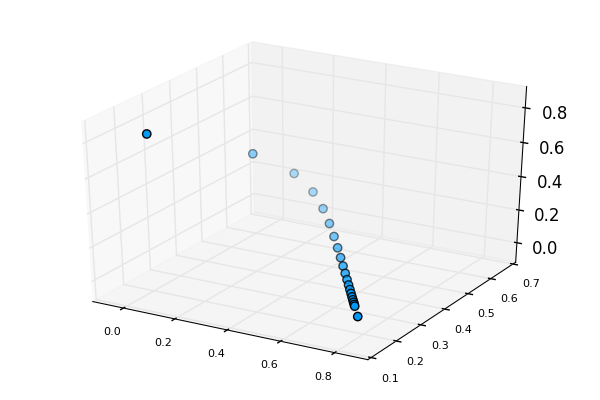

In [4]:
using Plots
using QuantEcon

P =[0.971 0.029 0.000
    0.145 0.778 0.077
    0.000 0.508 0.492]

psi = [0.0 0.2 0.8]

t = 20
x_vals = Array(Float64, t+1)
y_vals = Array(Float64, t+1)
z_vals = Array(Float64, t+1)

for i=1:t
    x_vals[i] = psi[1]
    y_vals[i] = psi[2]
    z_vals[i] = psi[3]
    psi = psi*P
end

P = MarkovChain(P)
psi_star = mc_compute_stationary(P)

x_vals[end] = psi_star[1]
y_vals[end] = psi_star[2]
z_vals[end] = psi_star[3]

scatter3d(x_vals, y_vals, z_vals)

We can also illustrate the convergence to the stationary distribution differently.

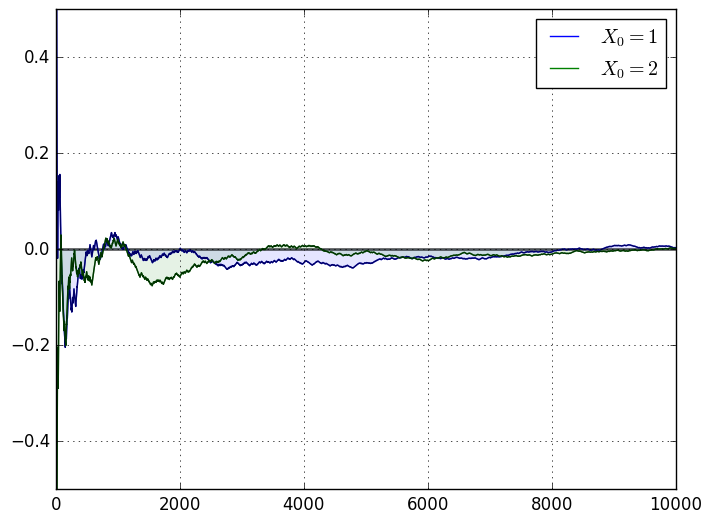

In [17]:
using PyPlot
using QuantEcon

α = β = 0.1
N = 10000 # The length of a Markov chain
p = β / (α + β) # The stationary probability to find a system in the {1} state 

P2 = [1-α  α   # Careful: P2 and p are distinct
     β  1-β]

mc2 = MarkovChain(P2)

fig, ax = subplots()
ax[:set_ylim](-0.5, 0.5)
ax[:grid]()
ax[:hlines](0, 0, N, lw=2, alpha=0.6)  # Horizonal line at zero

for (x0, col) in enumerate(["blue", "green"])
    # == Generate a sample that starts at x0 == #
    X = mc_sample_path(mc2, x0, N)

    # == Compute fraction of time the sample spents in state {1}, for each n == #
    X_bar = cumsum(X.==1) ./ (collect(1:N)) 

    # == Plot == #
    ax[:fill_between](1:N, zeros(N), X_bar - p, color=col, alpha=0.1)
    label = LaTeXString("\$X_0 = $x0\$")
    ax[:plot](X_bar - p, color=col, label=label)
    ax[:plot](X_bar - p, "k-", alpha=0.6)  # Overlay in black--make lines clearer
end

ax[:legend](loc="upper right")
fig[:show]()

## Random Walks (other features of the QuantEcon package)

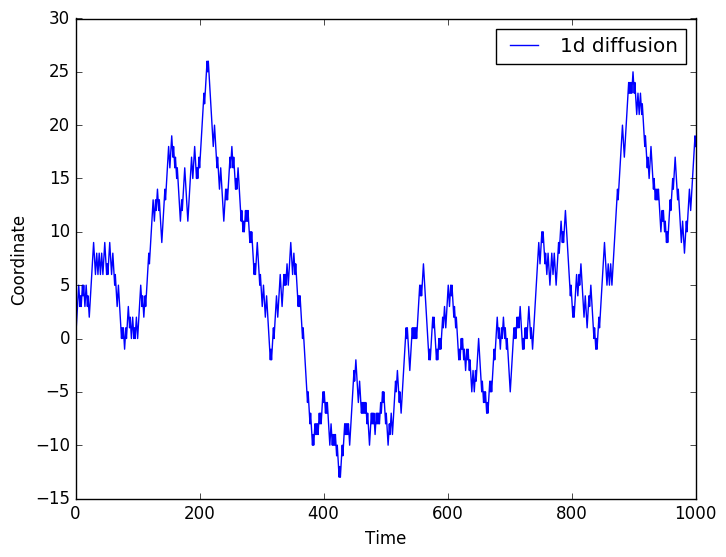

PyObject <matplotlib.legend.Legend object at 0x000000002A36F518>

In [31]:
using QuantEcon
using PyPlot

N=1000 # Amount of steps

psi = [0.5, 0.5]; # Left|Right probability
d = DiscreteRV(psi); # Single step

step = draw(d, N) 

y = Array(Int64, N+1);
y[1] = 0;

for i in 1:N
    if step[i]==1
        y[i+1]=y[i]-1
    else
        y[i+1]=y[i]+1
    end
end

PyPlot.plot(y, "b-", label="1d diffusion")
PyPlot.ylabel("Coordinate")
PyPlot.xlabel("Time")
PyPlot.legend()

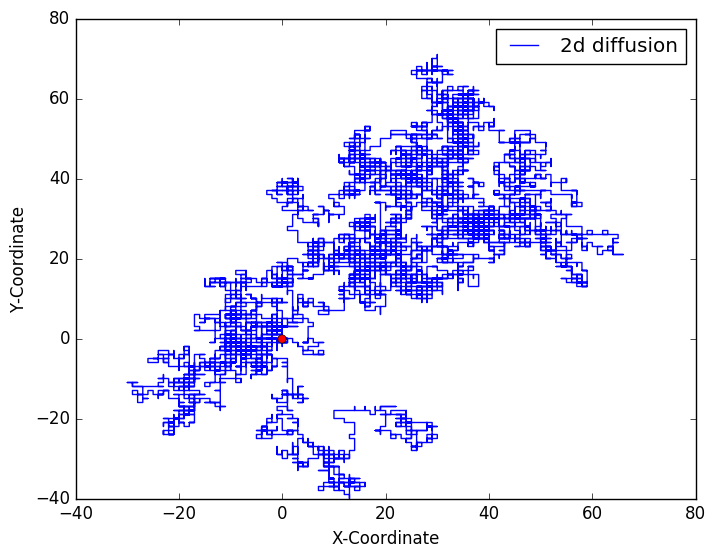

PyObject <matplotlib.legend.Legend object at 0x0000000036C026A0>

In [103]:
using QuantEcon
using PyPlot

N=10000 # Amount of steps

psi = [0.25, 0.25, 0.25, 0.25]; # Left|Right|Up|Down probability
d = DiscreteRV(psi); # Single step

step = draw(d, N) 

y = Array(Int64, N+1);
x = Array(Int64, N+1);
y[1] = 0;
x[1] = 0;

for i in 1:N
    if step[i]==1
        x[i+1]=x[i]-1
        y[i+1]=y[i]
    elseif step[i]==2
        x[i+1]=x[i]+1
        y[i+1]=y[i]
    elseif step[i]==3
        x[i+1]=x[i]
        y[i+1]=y[i]+1
    else
        x[i+1]=x[i]
        y[i+1]=y[i]-1        
    end
end

PyPlot.plot(x, y, "b-", label="2d diffusion")
PyPlot.plot(x[1], y[1], "ro")
#PyPlot.axis([-20, 20, -20, 20])
PyPlot.ylabel("Y-Coordinate")
PyPlot.xlabel("X-Coordinate")
PyPlot.legend()

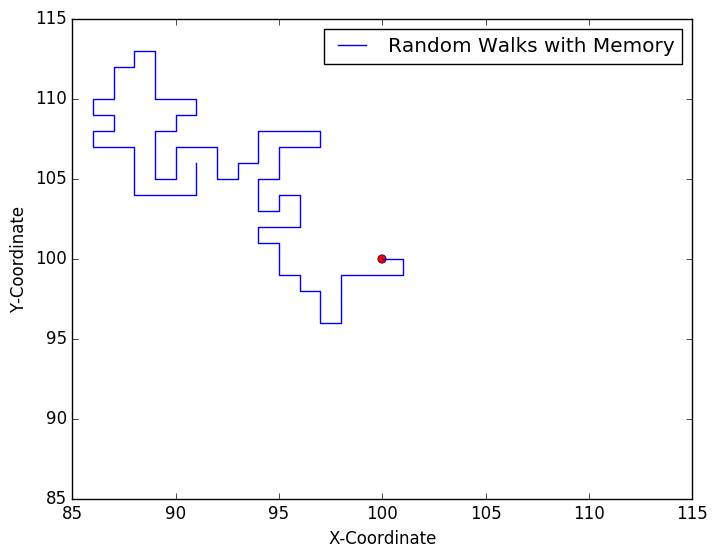

PyObject <matplotlib.legend.Legend object at 0x000000002AFD9EF0>

In [19]:
using PyPlot

N=200 # Number of steps

set = zeros(N,N) # the map of visited nodes
x = Array(Int64, N+1);
y = Array(Int64, N+1);
x[1] = div(N,2);
y[1] = div(N,2);
set[div(N,2),div(N,2)]=1;

i = 1

while i<N
    if (set[x[i]-1,y[i]]==1)&&(set[x[i]+1,y[i]]==1)&&(set[x[i],y[i]-1]==1)&&(set[x[i],y[i]+1]==1)
        break;
    else
        t = rand();
        if (t<0.25)&&(set[x[i]-1,y[i]]==0)
            x[i+1]=x[i]-1
            y[i+1]=y[i]
            set[x[i+1],y[i+1]]=1
            i = i+1
        elseif (0.25<=t<0.5)&&(set[x[i]+1,y[i]]==0)
            x[i+1]=x[i]+1
            y[i+1]=y[i]
            set[x[i+1],y[i+1]]=1
            i = i+1
        elseif (0.5<=t<0.75)&&(set[x[i],y[i]+1]==0)
            x[i+1]=x[i]
            y[i+1]=y[i]+1
            set[x[i+1],y[i+1]]=1
            i = i+1
        elseif (0.75<=t)&&(set[x[i],y[i]-1]==0)
            x[i+1]=x[i]
            y[i+1]=y[i]-1
            set[x[i+1],y[i+1]]=1
            i = i+1
        end
    end    
end

PyPlot.plot(x[1], y[1], "ro")
PyPlot.plot(x[1:i], y[1:i], "b-", label="Random Walks with Memory")
PyPlot.axis([div(N,2)-15, div(N,2)+15, div(N,2)-15, div(N,2)+15])
PyPlot.ylabel("Y-Coordinate")
PyPlot.xlabel("X-Coordinate")
PyPlot.legend()